<a href="https://colab.research.google.com/github/mcnica89/DATA6100/blob/main/Bootstrap_Example_for_Means_and_LinearRegression_with_OutOfBag_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bootstrap vs Theory Std Dev for mean of n random Gaussians

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

Mean of 100 standard Gaussian random variables
-----Theory-----
Stf Dev is 0.1
95% CI is -0.196 to 0.196
95% CI width 0.392
-----Simulations using 100000 indep samples-----
95% CI is -0.195 to 0.196
95% CI width 0.391


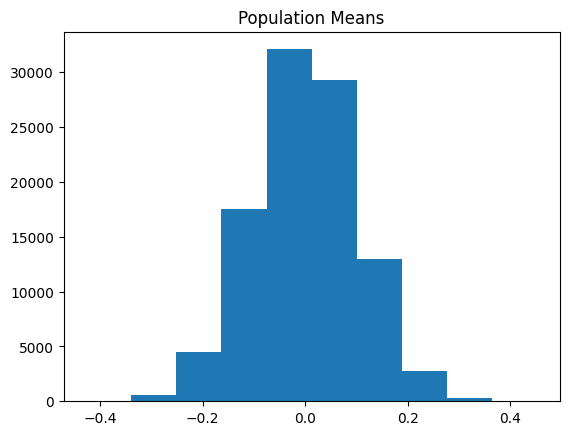

-----Bootstrap Using 1 sample-----
Sample Mean is 0.019
Results of Bootstrap Sample
95% CI is -0.189 to 0.225
95% CI width 0.414


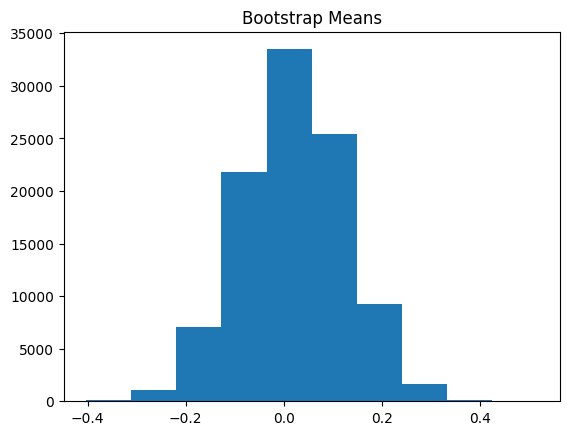

In [ ]:
def population_sample(N_samples,N):
  return np.random.randn(N_samples,N)

def bootstrap_sample(X,N_samples):
  N = len(X)
  ix = np.random.randint(0,N,(N,N_samples))
  ans = np.take_along_axis(X[:,np.newaxis],ix,0)
  return ans.T

def plot_and_CI(Xs, my_label):
  means = np.mean(Xs,axis=1)
  sort_means = np.sort(means)
  CI_up = sort_means[int(N_samples*0.975)]
  CI_low = sort_means[int(N_samples*0.025)]
  print(f"95% CI is {CI_low:.3f} to {CI_up:.3f}")
  print(f"95% CI width {CI_up - CI_low:.3f}")

  plt.hist(means)
  plt.title(my_label)
  plt.show()


N = 100
N_samples = 100000

print("===============================================")
print(f"Mean of {N} standard Gaussian random variables")
print("===============================================")

print("-----Theory-----")
print(f"Stf Dev is {1/np.sqrt(N)}")
print(f"95% CI is {-1.96/np.sqrt(N):.3f} to {1.96/np.sqrt(N):.3f}")
print(f"95% CI width {3.92/np.sqrt(N):.3f}")


print(f"-----Simulations using {N_samples} indep samples-----")
plot_and_CI(population_sample(N_samples,N),'Population Means')

print("-----Bootstrap Using 1 sample-----")
X = np.random.randn(N)
print(f"Sample Mean is {np.mean(X):.3f}")
print(f"Results of Bootstrap Sample")
plot_and_CI(bootstrap_sample(X,N_samples),'Bootstrap Means')


# Bootstrap Simple Linear Regression

## One single sample

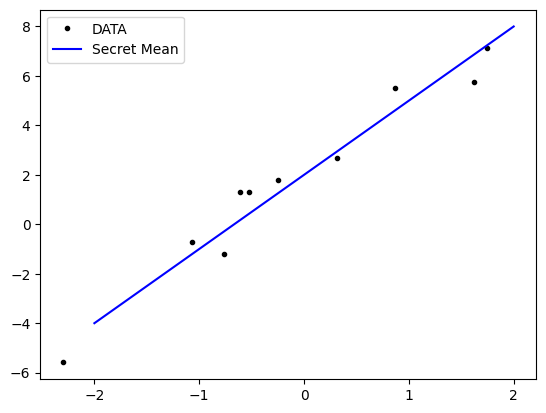

In [ ]:
#-----------------------------------
#Functions to generate some toy data
#-----------------------------------

# Range of x values possible
x_min,x_max = -2, 2
Sigma = 1 #This is the irreduicble noise in each observation y_i


True_Beta_0 = 2
True_Beta_1 = 3

# "Secret" functions used to generate the data
def secret_mean_func(x):
  return True_Beta_0+True_Beta_1*x
def secret_sd_func(x):
    return 1.0*np.ones_like(x) #return all 1s but of same shape as x


# Generate random data using np.random
# X are uniform in (x_min,x_max)
# Y generated according to secret mean and sd functions
def generate_data(N):
  def mean_zero_var_one_noise(N):
    return np.random.randn(N)
    #return (np.random.randn(N)**2 - 1)/np.sqrt(2) #Another option

  X = np.random.randn(N) #uniform(x_min,x_max,size=N)
  Epsilon = mean_zero_var_one_noise(N)
  Y = secret_mean_func(X)+Sigma*mean_zero_var_one_noise(N)

  return X,Y

N = 10
np.random.seed(1)
X,Y = generate_data(N)
x_axis = np.linspace(x_min,x_max,1000)
plt.plot(X,Y,'k.',label='DATA')
plt.plot(x_axis,secret_mean_func(x_axis),'b-',label='Secret Mean')
plt.legend()

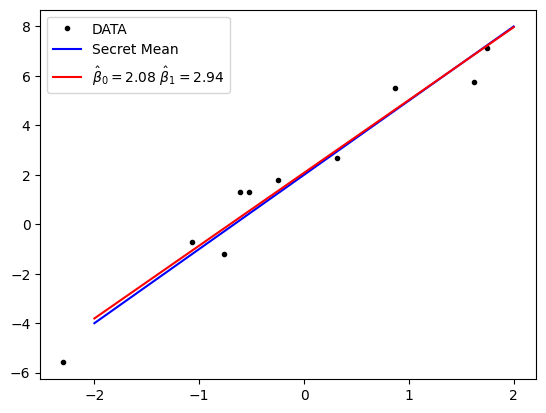

In [ ]:
def lin_reg(X_data,Y_data):
  X_bar = np.mean(X_data)
  Y_bar = np.mean(Y_data)
  Beta_hat_1 = np.sum( (X_data-X_bar)*(Y_data-Y_bar) )/np.sum( (X_data-X_bar)**2 )
  Beta_hat_0 = Y_bar - Beta_hat_1*X_bar
  return Beta_hat_0, Beta_hat_1

Beta_hat_0, Beta_hat_1 = lin_reg(X,Y)
plt.plot(X,Y,'k.',label='DATA')
plt.plot(x_axis,secret_mean_func(x_axis),'b-',label='Secret Mean')
my_label = r'$\hat{\beta}_0 = $' + f'{Beta_hat_0:.2f}' + r' $\hat{\beta}_1 = $' + f'{Beta_hat_1:.2f}'
plt.plot(x_axis,Beta_hat_0 + Beta_hat_1*x_axis, 'r-',label= my_label)
plt.legend()


## What you get if you have 20 different samples

Standard Error Beta 0: 0.30520583172422594
Standard Error Beta 1: 0.26553711520498147


Beta_0 and Beta_1 estimates:
Trial 0: 2.23, 3.29
Trial 1: 2.24, 2.80
Trial 2: 1.82, 2.48
Trial 3: 2.33, 3.08
Trial 4: 2.38, 3.04
Trial 5: 1.63, 3.68
Trial 6: 1.90, 2.49
Trial 7: 2.11, 3.37
Trial 8: 1.96, 3.12
Trial 9: 2.15, 3.10
Trial 10: 2.16, 3.20
Trial 11: 1.78, 3.10
Trial 12: 1.76, 3.16
Trial 13: 2.12, 2.49
Trial 14: 1.77, 2.77
Trial 15: 1.71, 2.89
Trial 16: 1.87, 3.23
Trial 17: 2.29, 2.66
Trial 18: 2.17, 3.88
Trial 19: 1.77, 2.16


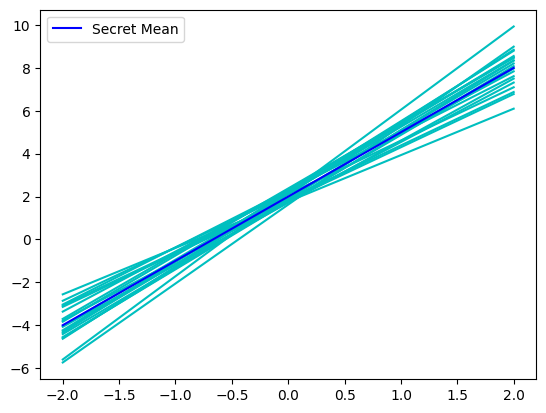

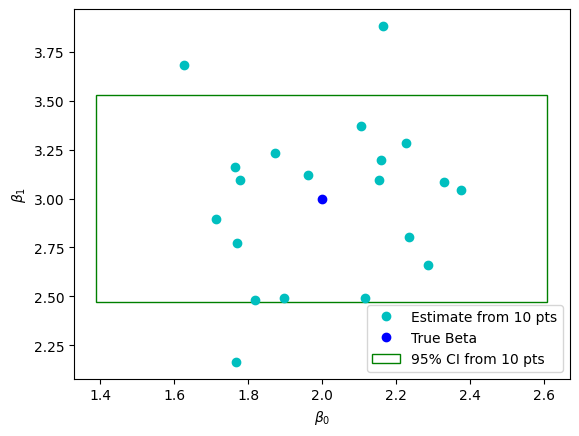

In [ ]:
N_trials = 20

X_bar = np.mean(X)
SE_Beta_0 = np.sqrt(Sigma**2*( 1 / N + X_bar / np.sum( (X - X_bar)**2 ) ))
SE_Beta_1 = np.sqrt(Sigma**2/np.sum( (X - X_bar)**2 ))
print(f"Standard Error Beta 0: {SE_Beta_0}")
print(f"Standard Error Beta 1: {SE_Beta_1}")
print("\n")


Beta_0_estimates = np.zeros(N_trials)
Beta_1_estimates = np.zeros(N_trials)

print("Beta_0 and Beta_1 estimates:")
for i in range(N_trials):
  X,Y = generate_data(N)
  Beta_hat_0,Beta_hat_1 = lin_reg(X,Y)
  #my_label = r'$\hat{\beta}_0 = $' + f'{Beta_hat_0:.2f}' + r' $\hat{\beta}_1 = $' + f'{Beta_hat_1:.2f}'
  plt.plot(x_axis,Beta_hat_0 + Beta_hat_1*x_axis, 'c-')
  Beta_0_estimates[i] =  Beta_hat_0
  Beta_1_estimates[i] =  Beta_hat_1
  print(f"Trial {i}: {Beta_hat_0:.2f}, {Beta_hat_1:.2f}")

plt.plot(x_axis,secret_mean_func(x_axis),'b-',label='Secret Mean')

plt.legend()
plt.show()

####Standard Errors####

plt.plot(Beta_0_estimates, Beta_1_estimates,'co',label=f"Estimate from {N} pts" )
plt.plot([True_Beta_0], [True_Beta_1],'bo',label="True Beta")
plt.xlabel(r"$\beta_0$")
plt.ylabel(r"$\beta_1$")


plt.gca().add_patch(Rectangle((True_Beta_0 - 2*SE_Beta_0, True_Beta_1 - 2*SE_Beta_1),4*SE_Beta_0,4*SE_Beta_1,linewidth=1,edgecolor='g',facecolor='none',label=f"95% CI from {N} pts"))
plt.legend()


## Using one sample to generate bootstrap samples

Standard Error Beta 0: 0.22171397851113822
Standard Error Beta 1: 0.5457341135873859


Beta_0 and Beta_1 estimates:


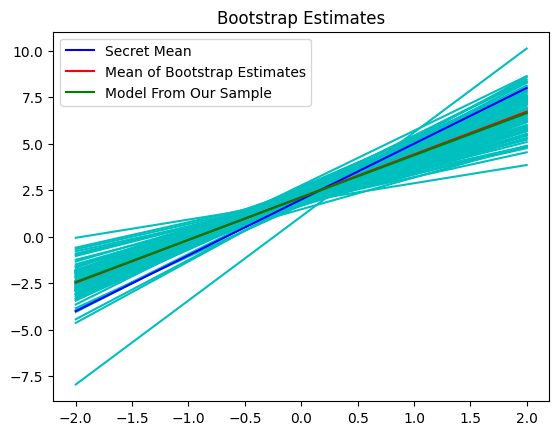

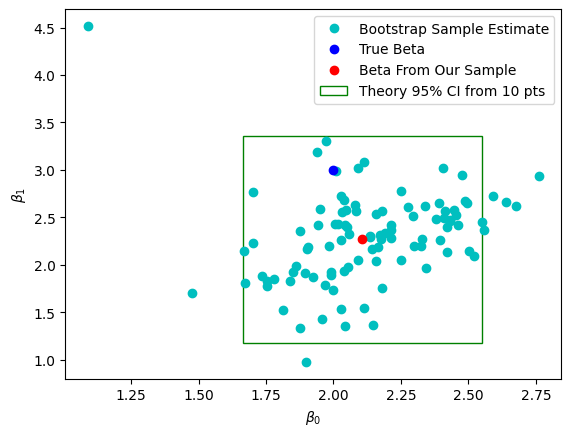

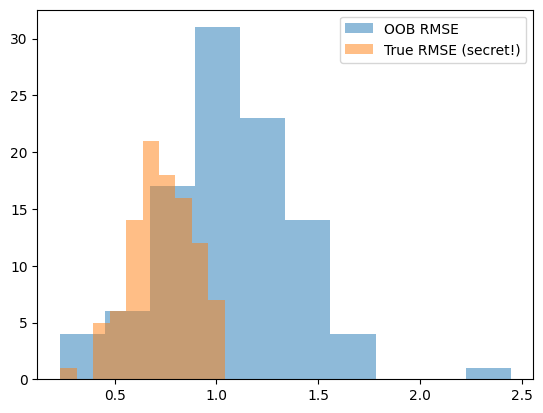

In [ ]:
N_trials = 100

X_bar = np.mean(X)
SE_Beta_0 = np.sqrt(Sigma**2*( 1 / N + X_bar / np.sum( (X - X_bar)**2 ) ))
SE_Beta_1 = np.sqrt(Sigma**2/np.sum( (X - X_bar)**2 ))
print(f"Standard Error Beta 0: {SE_Beta_0}")
print(f"Standard Error Beta 1: {SE_Beta_1}")
print("\n")


Beta_0_estimates = np.zeros(N_trials)
Beta_1_estimates = np.zeros(N_trials)
oob_RMSEs = np.zeros(N_trials)
true_RMSEs = np.zeros(N_trials)

N = 10
X,Y = generate_data(N)


def missing_indices(arr, n):
    # Generate a set of all indices between 1 and n
    full_set = set(range(n))
    # Convert the array to a set for faster lookup
    arr_set = set(arr)
    # Find missing indices by taking the difference
    missing_indices = sorted(list(full_set - arr_set))
    return missing_indices


print("Beta_0 and Beta_1 estimates:")
plt.title("Bootstrap Estimates")
for i in range(N_trials):

  #Get indicies for bootstrapping
  ix = np.random.randint(0,N,N)
  X_bt,Y_bt = X[ix],Y[ix]

`
  #Get indicies for OOB
  missing_ix = missing_indices(ix,N)
  X_bt_missing,Y_bt_missing = X[missing_ix],Y[missing_ix]

  Beta_hat_0,Beta_hat_1 = lin_reg(X_bt,Y_bt)
  #my_label = r'$\hat{\beta}_0 = $' + f'{Beta_hat_0:.2f}' + r' $\hat{\beta}_1 = $' + f'{Beta_hat_1:.2f}'
  plt.plot(x_axis,Beta_hat_0 + Beta_hat_1*x_axis, 'c-')

  oob_RMSE = np.sqrt(np.mean((Beta_hat_0 + Beta_hat_1*X_bt_missing - Y_bt_missing)**2))
  true_RMSE = np.sqrt(np.mean((Beta_hat_0 + Beta_hat_1*X_bt - Y_bt)**2))
  oob_RMSEs[i] = oob_RMSE
  true_RMSEs[i] = true_RMSE
  Beta_0_estimates[i] =  Beta_hat_0
  Beta_1_estimates[i] =  Beta_hat_1
  #print(f"Trial {i}: {Beta_hat_0:.2f}, {Beta_hat_1:.2f}")

plt.plot(x_axis,secret_mean_func(x_axis),'b-',label='Secret Mean')
plt.plot(x_axis,np.mean(Beta_0_estimates)+np.mean(Beta_1_estimates)*x_axis,'r-',label='Mean of Bootstrap Estimates')
my_beta_0, my_beta_1 = lin_reg(X,Y)
plt.plot(x_axis,my_beta_0+my_beta_1*x_axis,'g-',label='Model From Our Sample')

plt.legend()
plt.show()

####Standard Errors####

plt.plot(Beta_0_estimates, Beta_1_estimates,'co',label=f"Bootstrap Sample Estimate" )
plt.plot([True_Beta_0], [True_Beta_1],'bo',label="True Beta")

My_Beta_0,My_Beta_1 = lin_reg(X,Y)
plt.plot([My_Beta_0], [My_Beta_1],'ro',label="Beta From Our Sample")

plt.xlabel(r"$\beta_0$")
plt.ylabel(r"$\beta_1$")


plt.gca().add_patch(Rectangle((My_Beta_0 - 2*SE_Beta_0, My_Beta_1 - 2*SE_Beta_1),4*SE_Beta_0,4*SE_Beta_1,linewidth=1,edgecolor='g',facecolor='none',label=f"Theory 95% CI from {N} pts"))
plt.legend()
plt.show()

plt.hist(oob_RMSEs,alpha=0.5,label="OOB RMSE")
plt.hist(true_RMSEs,alpha=0.5,label="True RMSE (secret!)")
plt.legend()


